# Glossary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Import and Check the Data

In [2]:
def check_data_quality(df):
    print("The shape:")
    print(df.shape)

    missing_values = df.isna().sum()
    if missing_values.sum() == 0:
        print("\nNo missing values found.")
    else:
        print("Columns with missing values:")
        print(missing_values[missing_values != 0])

    print("\nData types:")
    print(df.dtypes)
    
    print("\nUnique types:")
    print(df.nunique())

    print("\nSummary Statistics:")
    df.describe()

    df.hist(bins=50, figsize=(20,15))
    
    
    
def position_to_number(pos):
    if pos == 'PG':
        return 1
    elif (pos == 'PG-SG' or pos == 'SG-PG'):
        return 1.5
    elif (pos == 'SG' or pos == 'SG-PG-SF'):
        return 2
    elif (pos == 'SG-SF' or pos == 'SF-SG'):
        return 2.5
    elif pos == 'SF':
        return 3
    elif pos == 'PF-SF':
        return 3.5
    elif pos == 'PF':
        return 4
    elif pos == 'C-PF':
        return 4.5
    elif pos == 'C':
        return 5
    
    

def add_season_column(df):
    seasons = []
    current_season = 1980
    count = 0
    
    for index, row in df.iterrows():
        if row['Rk'] == 1 and count > 100:
            current_season += 1
            count = 0
        count += 1
        seasons.append(current_season)

    df['Season'] = seasons
    df.drop(df.columns[[19, 24, 29]], axis=1, inplace=True)
    df['Pos'] = df['Pos'].apply(position_to_number)
    del df["Rk"]
    df = df.dropna()
    return df

def add_target(group, targets):
    for target in targets:
        group[target + " Next Season"] = group[target].shift(-1)
    group.dropna(subset=[target + " Next Season" for target in targets], inplace=True)
    return group

In [3]:
df = add_season_column(pd.read_csv("nba_player_1980-2022.csv"))
df.head(3)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Season
0,Kareem Abdul-Jabbar*,5.0,32.0,LAL,82.0,3143.0,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.8,2.4,7.2,7.3,1980
1,Tom Abernethy,4.0,25.0,GSW,67.0,1222.0,11.0,0.511,0.003,0.258,5.4,12.0,8.6,9.3,1.4,0.6,9.9,13.3,1.2,0.8,2.0,0.080,-1.0,-0.2,-1.2,0.2,1980
2,Alvan Adams,5.0,25.0,PHO,75.0,2168.0,19.2,0.571,0.002,0.270,8.2,22.4,15.4,21.6,2.3,1.4,18.2,21.9,3.1,3.9,7.0,0.155,1.7,1.9,3.6,3.1,1980


In [4]:
df[df['Player'] == 'Stephen Curry'].head(3)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Season
14285,Stephen Curry,1.0,21.0,GSW,80.0,2896.0,16.3,0.568,0.332,0.175,1.8,12.0,6.8,24.6,2.5,0.5,16.5,21.8,3.0,1.6,4.7,0.077,1.1,-0.5,0.7,2.0,2010
14896,Stephen Curry,1.0,22.0,GSW,74.0,2489.0,19.4,0.595,0.325,0.216,2.3,10.9,6.5,28.1,2.2,0.6,16.4,24.4,5.4,1.3,6.6,0.128,3.0,-0.7,2.3,2.7,2011
15477,Stephen Curry,1.0,23.0,GSW,26.0,732.0,21.2,0.605,0.409,0.159,2.3,11.3,6.8,32.3,2.8,0.8,17.0,24.0,1.8,0.4,2.2,0.144,4.1,0.3,4.3,1.2,2012


The shape:
(22963, 27)

No missing values found.

Data types:
Player     object
Pos       float64
Age       float64
Tm         object
G         float64
MP        float64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
Season      int64
dtype: object

Unique types:
Player    3463
Pos          9
Age         27
Tm          41
G           85
MP        3217
PER        569
TS%        630
3PAr       862
FTr        920
ORB%       314
DRB%       421
TRB%       328
AST%       520
STL%       119
BLK%       138
TOV%       413
USG%       417
OWS        174
DWS         88
WS         203
WS/48      825
OBPM       391
DBPM       238
BPM        473
VORP       128
Season      44
dtype: int64

Summ

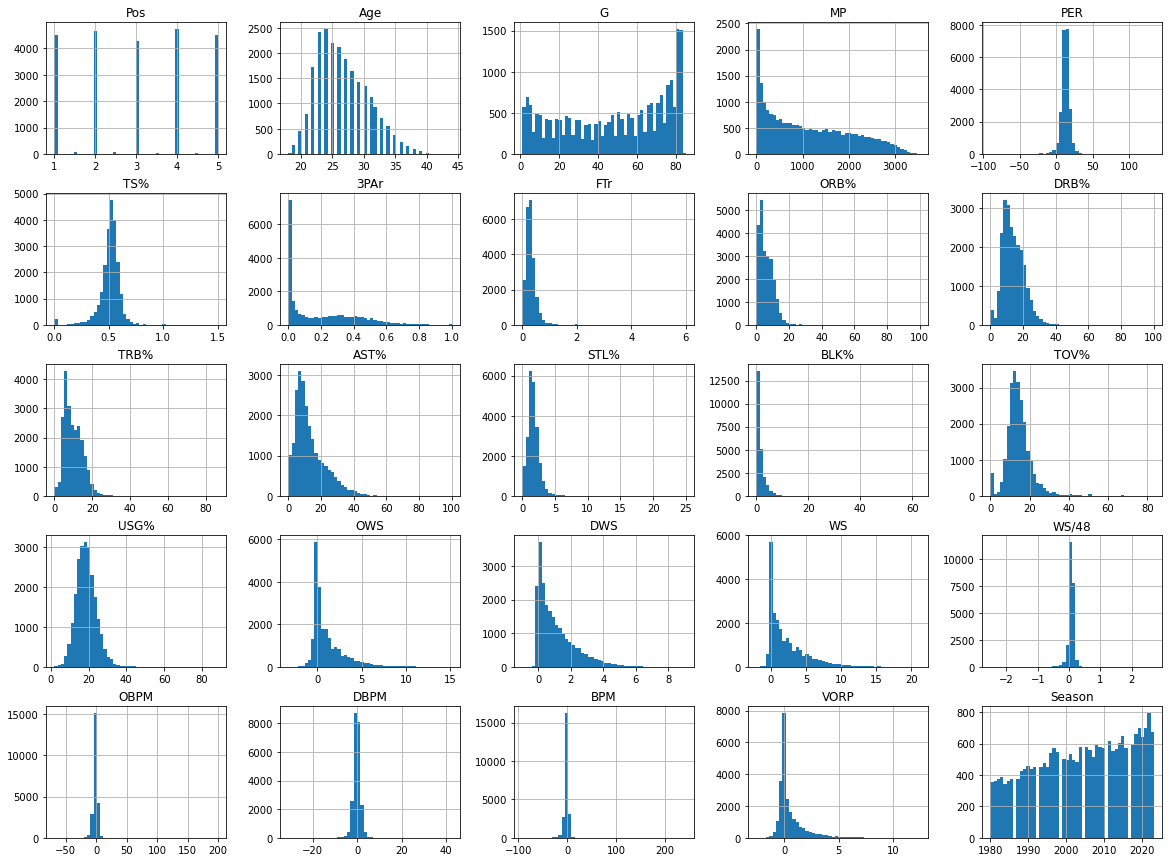

In [5]:
check_data_quality(df)

# Prepairing the Data

In [6]:
df['Player'] = df['Player'].str.rstrip('*')
df = df[df['G'] > 20]
df['Next_Season'] = df['Season'] + 1

target_list = ['WS', 'PER']  # List of targets
df = df.groupby("Player").apply(lambda x: add_target(x, target_list))
df.reset_index(drop=True, inplace=True)

In [7]:
df[df['Player']=='Deni Avdija']

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Season,Next_Season,WS Next Season,PER Next Season
3742,Deni Avdija,3.0,20.0,WAS,54.0,1257.0,7.6,0.515,0.538,0.144,1.9,20.2,11.0,6.3,1.2,1.0,9.0,12.0,0.0,1.2,1.2,0.046,-3.6,0.4,-3.1,-0.4,2021,2022,2.4,11.6
3743,Deni Avdija,3.0,21.0,WAS,82.0,1984.0,11.6,0.536,0.447,0.235,3.0,20.5,11.9,11.8,1.5,1.9,12.0,16.3,0.6,1.8,2.4,0.058,-2.1,0.4,-1.7,0.1,2022,2023,2.3,11.2


# Supervised
Exploratory data analysis

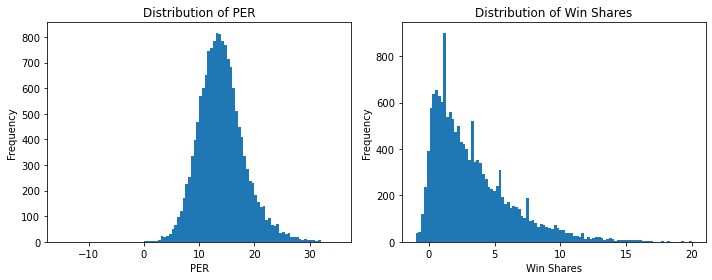

In [8]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the histogram for PER
axs[0].hist(df['PER'], bins=100, range=(-15, 35))
axs[0].set_title('Distribution of PER')
axs[0].set_xlabel('PER')
axs[0].set_ylabel('Frequency')

# Plot the histogram for Win Shares (WS)
axs[1].hist(df['WS'], bins=100, range=(-1, 20))
axs[1].set_title('Distribution of Win Shares')
axs[1].set_xlabel('Win Shares')
axs[1].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

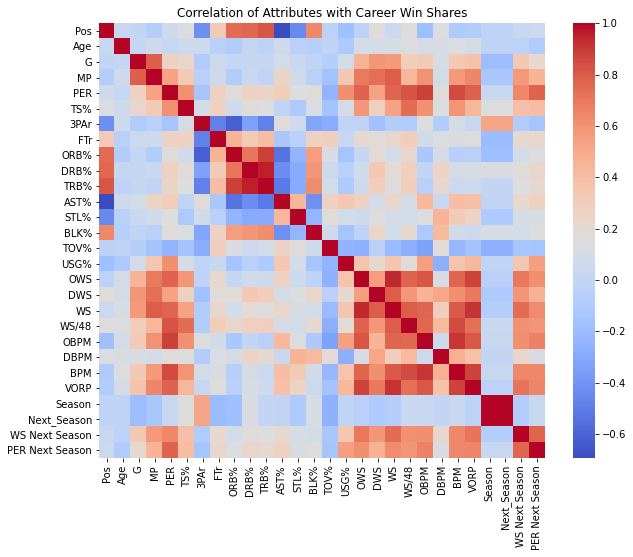

In [9]:
# Calculate the correlation matrix
correlation_matrix = df[df.columns.tolist()].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation of Attributes with Career Win Shares')
plt.show()

# Auto ML

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def generate_predictions(model, X):
    predictions = model.predict(X)
    return predictions

def evaluate_models(models, X, y, test_size=0.2, random_state=42):
    results = []

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    for model_name, model in models:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Generate predictions on the entire dataset
        predictions = generate_predictions(model, X_test)

        # Calculate evaluation metrics
        rmse = mean_squared_error(y_test, predictions, squared=False)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        # Store the results in a dictionary
        result = {
            'Model': model_name,
            'RMSE': rmse,
            'MAE': mae,
            'R2 Score': r2,
        }
        results.append(result)

    metrics_df = pd.DataFrame(results)
    return metrics_df

In [11]:
# Define the models
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('ElasticNet', ElasticNet()),
    ('Huber Regression', HuberRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('XGBoost', xgb.XGBRegressor()),
    ('LightGBM', lgb.LGBMRegressor()),
    ('MLP', MLPRegressor()),
    ('GBM', GradientBoostingRegressor()),
    ('CatBoost', CatBoostRegressor()),
    ('KNN', KNeighborsRegressor()),
    ('Extra Trees', ExtraTreesRegressor()),
    ('Kernel Ridge', KernelRidge())
]

removed_columns = ['Player', 'Tm', 'OWS', 'WS Next Season', 'PER Next Season']
selected_columns = df.columns[~df.columns.isin(removed_columns)]

X = df[selected_columns].values
y_WS = df['WS Next Season'].values

X = df[selected_columns].values
y_PER = df['PER Next Season'].values

In [12]:
# Call the method with your data
metrics_WS = evaluate_models(models, X, y_WS)
metrics_PER = evaluate_models(models, X, y_PER)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Learning rate set to 0.060816
0:	learn: 2.9134062	total: 147ms	remaining: 2m 27s
1:	learn: 2.8285555	total: 160ms	remaining: 1m 19s
2:	learn: 2.7520274	total: 172ms	remaining: 57.3s
3:	learn: 2.6816186	total: 186ms	remaining: 46.2s
4:	learn: 2.6152463	total: 198ms	remaining: 39.4s
5:	learn: 2.5552026	total: 209ms	remaining: 34.6s
6:	learn: 2.5023496	total: 220ms	remaining: 31.2s
7:	learn: 2.4514496	total: 231ms	remaining: 28.6s
8:	learn: 2.4081360	total: 242ms	remaining: 26.6s
9:	learn: 2.3655718	total: 252ms	remaining: 25s
10:	learn: 2.3259549	total: 262ms	remaining: 23.6s
11:	learn: 2.2932855	total: 270ms	remaining: 22.3s
12:	learn: 2.2617094	total: 278ms	remaining: 21.1s
13:	learn: 2.2320650	total: 286ms	remaining: 20.2s
14:	learn: 2.2062728	total: 295ms	remaining: 19.3s
15:	learn: 2.1816918	total: 303ms	remaining: 18.6s
16:	learn: 2.1584273	total: 311ms	remaining: 18s
17:	learn: 2.1379439	total: 319ms	remaining: 17.4s
18:	learn: 2.1188339	total: 328ms	remaining: 16.9s
19:	learn: 2.

177:	learn: 1.8000974	total: 1.48s	remaining: 6.85s
178:	learn: 1.7994077	total: 1.49s	remaining: 6.84s
179:	learn: 1.7986719	total: 1.5s	remaining: 6.83s
180:	learn: 1.7979562	total: 1.51s	remaining: 6.82s
181:	learn: 1.7969329	total: 1.51s	remaining: 6.8s
182:	learn: 1.7959663	total: 1.52s	remaining: 6.79s
183:	learn: 1.7950323	total: 1.53s	remaining: 6.78s
184:	learn: 1.7946260	total: 1.53s	remaining: 6.76s
185:	learn: 1.7940772	total: 1.54s	remaining: 6.75s
186:	learn: 1.7932084	total: 1.55s	remaining: 6.74s
187:	learn: 1.7925058	total: 1.56s	remaining: 6.72s
188:	learn: 1.7919542	total: 1.56s	remaining: 6.71s
189:	learn: 1.7914847	total: 1.57s	remaining: 6.71s
190:	learn: 1.7911309	total: 1.58s	remaining: 6.71s
191:	learn: 1.7901412	total: 1.59s	remaining: 6.71s
192:	learn: 1.7896398	total: 1.6s	remaining: 6.71s
193:	learn: 1.7880590	total: 1.61s	remaining: 6.71s
194:	learn: 1.7871325	total: 1.63s	remaining: 6.71s
195:	learn: 1.7863647	total: 1.63s	remaining: 6.71s
196:	learn: 1.7

349:	learn: 1.6887768	total: 2.73s	remaining: 5.08s
350:	learn: 1.6883880	total: 2.74s	remaining: 5.07s
351:	learn: 1.6876476	total: 2.75s	remaining: 5.06s
352:	learn: 1.6869356	total: 2.76s	remaining: 5.05s
353:	learn: 1.6860799	total: 2.77s	remaining: 5.05s
354:	learn: 1.6855305	total: 2.77s	remaining: 5.04s
355:	learn: 1.6849611	total: 2.78s	remaining: 5.03s
356:	learn: 1.6845130	total: 2.79s	remaining: 5.02s
357:	learn: 1.6839773	total: 2.8s	remaining: 5.02s
358:	learn: 1.6833277	total: 2.81s	remaining: 5.01s
359:	learn: 1.6829131	total: 2.81s	remaining: 5s
360:	learn: 1.6825791	total: 2.82s	remaining: 4.99s
361:	learn: 1.6823907	total: 2.83s	remaining: 4.99s
362:	learn: 1.6818884	total: 2.84s	remaining: 4.98s
363:	learn: 1.6814792	total: 2.84s	remaining: 4.97s
364:	learn: 1.6806975	total: 2.85s	remaining: 4.96s
365:	learn: 1.6800928	total: 2.86s	remaining: 4.96s
366:	learn: 1.6791562	total: 2.87s	remaining: 4.95s
367:	learn: 1.6784683	total: 2.88s	remaining: 4.94s
368:	learn: 1.67

516:	learn: 1.6071871	total: 4.22s	remaining: 3.94s
517:	learn: 1.6067165	total: 4.23s	remaining: 3.94s
518:	learn: 1.6063337	total: 4.24s	remaining: 3.93s
519:	learn: 1.6056628	total: 4.25s	remaining: 3.92s
520:	learn: 1.6053849	total: 4.26s	remaining: 3.91s
521:	learn: 1.6053699	total: 4.27s	remaining: 3.91s
522:	learn: 1.6053550	total: 4.27s	remaining: 3.9s
523:	learn: 1.6048024	total: 4.28s	remaining: 3.89s
524:	learn: 1.6044033	total: 4.29s	remaining: 3.88s
525:	learn: 1.6040154	total: 4.3s	remaining: 3.88s
526:	learn: 1.6037867	total: 4.31s	remaining: 3.87s
527:	learn: 1.6028823	total: 4.32s	remaining: 3.86s
528:	learn: 1.6028664	total: 4.33s	remaining: 3.85s
529:	learn: 1.6024710	total: 4.34s	remaining: 3.85s
530:	learn: 1.6019810	total: 4.35s	remaining: 3.84s
531:	learn: 1.6015923	total: 4.36s	remaining: 3.83s
532:	learn: 1.6011890	total: 4.36s	remaining: 3.82s
533:	learn: 1.6008045	total: 4.37s	remaining: 3.82s
534:	learn: 1.6002750	total: 4.38s	remaining: 3.81s
535:	learn: 1.

689:	learn: 1.5322870	total: 5.93s	remaining: 2.66s
690:	learn: 1.5322730	total: 5.94s	remaining: 2.65s
691:	learn: 1.5320859	total: 5.95s	remaining: 2.65s
692:	learn: 1.5317901	total: 5.96s	remaining: 2.64s
693:	learn: 1.5314436	total: 5.97s	remaining: 2.63s
694:	learn: 1.5311483	total: 5.98s	remaining: 2.62s
695:	learn: 1.5307632	total: 5.99s	remaining: 2.62s
696:	learn: 1.5301333	total: 6s	remaining: 2.61s
697:	learn: 1.5297147	total: 6.01s	remaining: 2.6s
698:	learn: 1.5291820	total: 6.02s	remaining: 2.59s
699:	learn: 1.5288887	total: 6.03s	remaining: 2.58s
700:	learn: 1.5285479	total: 6.04s	remaining: 2.58s
701:	learn: 1.5282616	total: 6.05s	remaining: 2.57s
702:	learn: 1.5279363	total: 6.06s	remaining: 2.56s
703:	learn: 1.5275324	total: 6.07s	remaining: 2.55s
704:	learn: 1.5272092	total: 6.08s	remaining: 2.54s
705:	learn: 1.5270442	total: 6.09s	remaining: 2.53s
706:	learn: 1.5264952	total: 6.1s	remaining: 2.53s
707:	learn: 1.5261921	total: 6.11s	remaining: 2.52s
708:	learn: 1.525

862:	learn: 1.4644995	total: 7.66s	remaining: 1.22s
863:	learn: 1.4641712	total: 7.67s	remaining: 1.21s
864:	learn: 1.4638909	total: 7.68s	remaining: 1.2s
865:	learn: 1.4636997	total: 7.69s	remaining: 1.19s
866:	learn: 1.4633235	total: 7.7s	remaining: 1.18s
867:	learn: 1.4627780	total: 7.71s	remaining: 1.17s
868:	learn: 1.4620905	total: 7.72s	remaining: 1.16s
869:	learn: 1.4616803	total: 7.73s	remaining: 1.15s
870:	learn: 1.4613588	total: 7.74s	remaining: 1.15s
871:	learn: 1.4612980	total: 7.75s	remaining: 1.14s
872:	learn: 1.4609363	total: 7.76s	remaining: 1.13s
873:	learn: 1.4605390	total: 7.77s	remaining: 1.12s
874:	learn: 1.4600616	total: 7.78s	remaining: 1.11s
875:	learn: 1.4597167	total: 7.79s	remaining: 1.1s
876:	learn: 1.4592535	total: 7.8s	remaining: 1.09s
877:	learn: 1.4588673	total: 7.81s	remaining: 1.08s
878:	learn: 1.4584105	total: 7.82s	remaining: 1.08s
879:	learn: 1.4579536	total: 7.83s	remaining: 1.07s
880:	learn: 1.4575827	total: 7.84s	remaining: 1.06s
881:	learn: 1.45

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Learning rate set to 0.060816
0:	learn: 4.1331073	total: 6.05ms	remaining: 6.05s
1:	learn: 4.0035238	total: 11.8ms	remaining: 5.88s
2:	learn: 3.8829862	total: 18.4ms	remaining: 6.1s
3:	learn: 3.7682058	total: 25.9ms	remaining: 6.45s
4:	learn: 3.6610046	total: 33.5ms	remaining: 6.68s
5:	learn: 3.5686656	total: 40.6ms	remaining: 6.73s
6:	learn: 3.4818718	total: 47.8ms	remaining: 6.79s
7:	learn: 3.4042967	total: 55.9ms	remaining: 6.93s
8:	learn: 3.3304150	total: 63.8ms	remaining: 7.03s
9:	learn: 3.2652645	total: 71.6ms	remaining: 7.09s
10:	learn: 3.2045633	total: 79.1ms	remaining: 7.11s
11:	learn: 3.1481979	total: 86.6ms	remaining: 7.13s
12:	learn: 3.0946203	total: 94.3ms	remaining: 7.16s
13:	learn: 3.0479046	total: 102ms	remaining: 7.2s
14:	learn: 3.0060484	total: 109ms	remaining: 7.13s
15:	learn: 2.9698186	total: 115ms	remaining: 7.06s
16:	learn: 2.9321439	total: 121ms	remaining: 6.99s
17:	learn: 2.8980988	total: 128ms	remaining: 6.96s
18:	learn: 2.8694238	total: 135ms	remaining: 6.98s


176:	learn: 2.4252445	total: 1.25s	remaining: 5.8s
177:	learn: 2.4245213	total: 1.25s	remaining: 5.8s
178:	learn: 2.4240310	total: 1.26s	remaining: 5.79s
179:	learn: 2.4227520	total: 1.27s	remaining: 5.79s
180:	learn: 2.4223858	total: 1.28s	remaining: 5.78s
181:	learn: 2.4218490	total: 1.28s	remaining: 5.78s
182:	learn: 2.4215287	total: 1.29s	remaining: 5.77s
183:	learn: 2.4209581	total: 1.3s	remaining: 5.76s
184:	learn: 2.4201929	total: 1.31s	remaining: 5.75s
185:	learn: 2.4197350	total: 1.31s	remaining: 5.75s
186:	learn: 2.4193390	total: 1.32s	remaining: 5.74s
187:	learn: 2.4187651	total: 1.33s	remaining: 5.73s
188:	learn: 2.4184907	total: 1.33s	remaining: 5.72s
189:	learn: 2.4175698	total: 1.34s	remaining: 5.71s
190:	learn: 2.4164989	total: 1.35s	remaining: 5.7s
191:	learn: 2.4163406	total: 1.35s	remaining: 5.69s
192:	learn: 2.4150786	total: 1.36s	remaining: 5.68s
193:	learn: 2.4140613	total: 1.37s	remaining: 5.68s
194:	learn: 2.4129957	total: 1.37s	remaining: 5.67s
195:	learn: 2.41

338:	learn: 2.3090050	total: 2.53s	remaining: 4.94s
339:	learn: 2.3082943	total: 2.54s	remaining: 4.94s
340:	learn: 2.3079972	total: 2.55s	remaining: 4.93s
341:	learn: 2.3073454	total: 2.56s	remaining: 4.93s
342:	learn: 2.3067283	total: 2.57s	remaining: 4.92s
343:	learn: 2.3058944	total: 2.58s	remaining: 4.92s
344:	learn: 2.3052178	total: 2.59s	remaining: 4.92s
345:	learn: 2.3043158	total: 2.6s	remaining: 4.91s
346:	learn: 2.3034781	total: 2.61s	remaining: 4.91s
347:	learn: 2.3027373	total: 2.62s	remaining: 4.91s
348:	learn: 2.3020293	total: 2.63s	remaining: 4.9s
349:	learn: 2.3015605	total: 2.64s	remaining: 4.9s
350:	learn: 2.3007390	total: 2.65s	remaining: 4.89s
351:	learn: 2.3000535	total: 2.66s	remaining: 4.89s
352:	learn: 2.2990650	total: 2.67s	remaining: 4.89s
353:	learn: 2.2984536	total: 2.67s	remaining: 4.88s
354:	learn: 2.2976923	total: 2.69s	remaining: 4.88s
355:	learn: 2.2966751	total: 2.69s	remaining: 4.88s
356:	learn: 2.2963058	total: 2.71s	remaining: 4.87s
357:	learn: 2.2

511:	learn: 2.1923837	total: 4.24s	remaining: 4.04s
512:	learn: 2.1917797	total: 4.25s	remaining: 4.03s
513:	learn: 2.1911804	total: 4.26s	remaining: 4.03s
514:	learn: 2.1903337	total: 4.27s	remaining: 4.02s
515:	learn: 2.1898334	total: 4.28s	remaining: 4.02s
516:	learn: 2.1893882	total: 4.29s	remaining: 4.01s
517:	learn: 2.1886813	total: 4.3s	remaining: 4s
518:	learn: 2.1886396	total: 4.31s	remaining: 4s
519:	learn: 2.1877318	total: 4.32s	remaining: 3.99s
520:	learn: 2.1871895	total: 4.33s	remaining: 3.98s
521:	learn: 2.1864684	total: 4.34s	remaining: 3.98s
522:	learn: 2.1858455	total: 4.35s	remaining: 3.97s
523:	learn: 2.1855096	total: 4.36s	remaining: 3.96s
524:	learn: 2.1850122	total: 4.37s	remaining: 3.95s
525:	learn: 2.1843285	total: 4.38s	remaining: 3.95s
526:	learn: 2.1835728	total: 4.39s	remaining: 3.94s
527:	learn: 2.1828076	total: 4.4s	remaining: 3.94s
528:	learn: 2.1824339	total: 4.41s	remaining: 3.93s
529:	learn: 2.1820533	total: 4.42s	remaining: 3.92s
530:	learn: 2.181225

676:	learn: 2.0971532	total: 5.97s	remaining: 2.85s
677:	learn: 2.0968434	total: 5.98s	remaining: 2.84s
678:	learn: 2.0962446	total: 5.99s	remaining: 2.83s
679:	learn: 2.0955514	total: 6s	remaining: 2.82s
680:	learn: 2.0951473	total: 6.01s	remaining: 2.81s
681:	learn: 2.0945802	total: 6.02s	remaining: 2.81s
682:	learn: 2.0938708	total: 6.03s	remaining: 2.8s
683:	learn: 2.0935436	total: 6.04s	remaining: 2.79s
684:	learn: 2.0930896	total: 6.05s	remaining: 2.78s
685:	learn: 2.0921160	total: 6.06s	remaining: 2.77s
686:	learn: 2.0916140	total: 6.07s	remaining: 2.76s
687:	learn: 2.0909856	total: 6.08s	remaining: 2.75s
688:	learn: 2.0902864	total: 6.09s	remaining: 2.75s
689:	learn: 2.0896227	total: 6.1s	remaining: 2.74s
690:	learn: 2.0887641	total: 6.11s	remaining: 2.73s
691:	learn: 2.0879320	total: 6.12s	remaining: 2.72s
692:	learn: 2.0872873	total: 6.13s	remaining: 2.71s
693:	learn: 2.0869432	total: 6.13s	remaining: 2.7s
694:	learn: 2.0864318	total: 6.14s	remaining: 2.7s
695:	learn: 2.08608

839:	learn: 2.0130544	total: 7.68s	remaining: 1.46s
840:	learn: 2.0125944	total: 7.69s	remaining: 1.45s
841:	learn: 2.0124281	total: 7.7s	remaining: 1.45s
842:	learn: 2.0119417	total: 7.71s	remaining: 1.44s
843:	learn: 2.0114244	total: 7.72s	remaining: 1.43s
844:	learn: 2.0109731	total: 7.73s	remaining: 1.42s
845:	learn: 2.0102234	total: 7.74s	remaining: 1.41s
846:	learn: 2.0098953	total: 7.75s	remaining: 1.4s
847:	learn: 2.0093926	total: 7.76s	remaining: 1.39s
848:	learn: 2.0088808	total: 7.77s	remaining: 1.38s
849:	learn: 2.0088475	total: 7.78s	remaining: 1.37s
850:	learn: 2.0085592	total: 7.79s	remaining: 1.36s
851:	learn: 2.0078356	total: 7.8s	remaining: 1.35s
852:	learn: 2.0074051	total: 7.81s	remaining: 1.34s
853:	learn: 2.0068441	total: 7.82s	remaining: 1.34s
854:	learn: 2.0063600	total: 7.83s	remaining: 1.33s
855:	learn: 2.0060794	total: 7.84s	remaining: 1.32s
856:	learn: 2.0055557	total: 7.85s	remaining: 1.31s
857:	learn: 2.0054698	total: 7.86s	remaining: 1.3s
858:	learn: 2.00

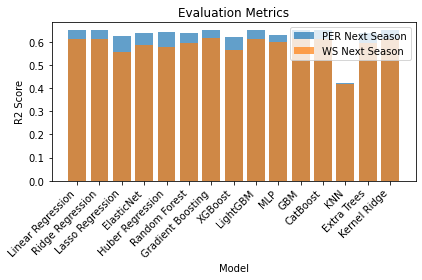

In [13]:
plt.bar(metrics_PER['Model'], metrics_PER['R2 Score'], label='PER Next Season', alpha=0.7)
plt.bar(metrics_WS['Model'], metrics_WS['R2 Score'], label='WS Next Season', alpha=0.7)

# Add a horizontal line to separate the two sets of metrics
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Evaluation Metrics')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [14]:
df_sorted_WS = metrics_WS.sort_values(by='R2 Score', ascending=False).reset_index(drop=True)
df_sorted_PER = metrics_PER.sort_values(by='R2 Score', ascending=False).reset_index(drop=True)
df_sorted_WS.head(4)

,Model,RMSE,MAE,R2 Score
0,GBM,1.880965,1.419713,0.616502
1,Gradient Boosting,1.881183,1.420082,0.616413
2,LightGBM,1.890721,1.418359,0.612514
3,CatBoost,1.893367,1.418838,0.611428


In [15]:
df_sorted_PER.head(4)

,Model,RMSE,MAE,R2 Score
0,GBM,2.558961,1.986526,0.651214
1,Gradient Boosting,2.559362,1.986955,0.651105
2,CatBoost,2.562780,1.993948,0.650172
3,Ridge Regression,2.564560,1.983811,0.649686


# Choose the 'Gradient Boosting' Model

In [16]:
# Split data for WS model
X_train_WS, X_test_WS, y_train_WS, y_test_WS = train_test_split(X, y_WS, test_size=0.2)

# Train WS model (before hyperparameter tuning)
model_WS_before_tuning = GradientBoostingRegressor()
model_WS_before_tuning.fit(X_train_WS, y_train_WS)

# Make predictions for WS (before hyperparameter tuning)
Predictions_WS_before_tuning = model_WS_before_tuning.predict(X)
df['Predictions_WS_before_tuning'] = Predictions_WS_before_tuning

In [17]:
# Split data for PER model
X_train_PER, X_test_PER, y_train_PER, y_test_PER = train_test_split(X, y_PER, test_size=0.2)

# Train PER model (before hyperparameter tuning)
model_PER_before_tuning = GradientBoostingRegressor()
model_PER_before_tuning.fit(X_train_PER, y_train_PER)

# Make predictions for PER (before hyperparameter tuning)
Predictions_PER_before_tuning = model_PER_before_tuning.predict(X)
df['Predictions_PER_before_tuning'] = Predictions_PER_before_tuning

#  Hyperparameter Tuning

In [18]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

In [19]:
# Perform hyperparameter tuning for WS model
grid_search_WS = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
grid_search_WS.fit(X_train_WS, y_train_WS)

# Get the best model from the hyperparameter tuning for WS
best_model_WS = grid_search_WS.best_estimator_

# Train the best model on the entire training set for WS
best_model_WS.fit(X_train_WS, y_train_WS)

# Make predictions for WS using the best model
Predictions_WS_after_tuning = best_model_WS.predict(X)
df['Predictions_WS_after_tuning'] = Predictions_WS_after_tuning

In [20]:
# Perform hyperparameter tuning for PER model
grid_search_PER = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
grid_search_PER.fit(X_train_PER, y_train_PER)

# Get the best model from the hyperparameter tuning for PER
best_model_PER = grid_search_PER.best_estimator_

# Train the best model on the entire training set for PER
best_model_PER.fit(X_train_PER, y_train_PER)

# Make predictions for PER using the best model
Predictions_PER_after_tuning = best_model_PER.predict(X)
df['Predictions_PER_after_tuning'] = Predictions_PER_after_tuning

# Checking for the Best Model

In [21]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def get_evaluation_scores(df):
    models = ['WS', 'PER']
    metrics = ['R2 Score', 'RMSE', 'MAE']
    before_afters = ['Before The Tuning', 'After The Tuning']
    results = []

    for model in models:
        y_true = df[f'{model} Next Season']
        before_tuning = df[f'Predictions_{model}_before_tuning']
        after_tuning = df[f'Predictions_{model}_after_tuning']

        r2_before_tuning = r2_score(y_true, before_tuning)
        r2_after_tuning = r2_score(y_true, after_tuning)
        rmse_before_tuning = np.sqrt(mean_squared_error(y_true, before_tuning))
        rmse_after_tuning = np.sqrt(mean_squared_error(y_true, after_tuning))
        mae_before_tuning = mean_absolute_error(y_true, before_tuning)
        mae_after_tuning = mean_absolute_error(y_true, after_tuning)

        model_results = [r2_before_tuning, rmse_before_tuning, mae_before_tuning,
                         r2_after_tuning, rmse_after_tuning, mae_after_tuning]
        results.append(model_results)

    columns = [f'{metric} ({before_after})' for before_after in before_afters for metric in metrics]
    results_df = pd.DataFrame(results, columns=columns, index=models)

    return results_df

In [22]:
evaluation_df = get_evaluation_scores(df)
evaluation_df

,R2 Score (Before The Tuning),RMSE (Before The Tuning),MAE (Before The Tuning),R2 Score (After The Tuning),RMSE (After The Tuning),MAE (After The Tuning)
WS,0.632160,1.828841,1.382699,0.653678,1.774542,1.343574
PER,0.671635,2.457427,1.905274,0.671683,2.457246,1.905257


# Results

In [23]:
def plot_model_results(predictions, model,  y_test, target_name):
    # Calculate feature importances
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': selected_columns, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Scatter plot of True vs. Predicted Values
    ax1.scatter(y_test, predictions)
    ax1.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    ax1.set_xlabel('True Values')
    ax1.set_ylabel('Predicted Values')
    ax1.set_title(f'Scatter Plot of True vs. Predicted Values ({target_name})')
    
    # Bar plot of Feature Importance
    ax2.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    ax2.set_xlabel('Importance')
    ax2.set_ylabel('Features')
    ax2.set_title(f'Feature Importance ({target_name})')
    ax2.invert_yaxis()  # Invert the y-axis to display features from top to bottom
    
    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.4)
    
    # Display the figure
    plt.show()

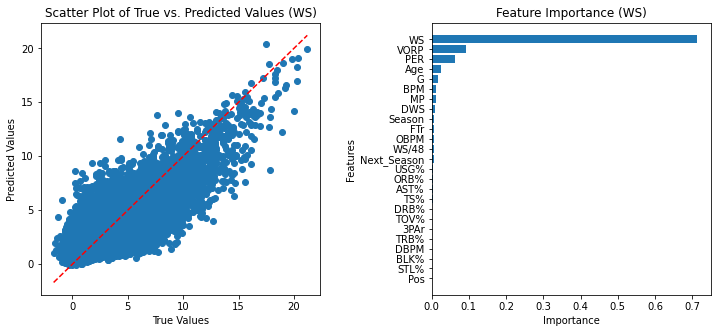

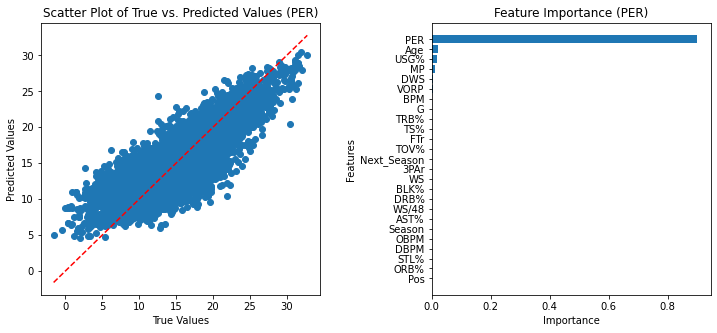

In [24]:
plot_model_results(Predictions_WS_after_tuning, best_model_WS, y_WS, 'WS')
plot_model_results(Predictions_PER_after_tuning, best_model_PER, y_PER, 'PER')

In [25]:
df['Predictions_WS'] = df['Predictions_WS_after_tuning']
df['Predictions_PER'] = df['Predictions_PER_after_tuning']

df['Similar_Player'] = df.apply(lambda row: df.loc[(df['Pos'] == row['Pos']) & 
                                                   (df['Player'] != row['Player']), ['WS', 'PER']]
                                                    .sub([row['Predictions_WS'], row['Predictions_PER']]).abs().sum(axis=1).idxmin(), axis=1)

df['Similar_Player_Season'] = df['Similar_Player'].apply(lambda x: df.loc[x, 'Season'] if pd.notnull(x) else np.nan)
df['Similar_Player'] = df['Similar_Player'].apply(lambda x: df.loc[x, 'Player'] if pd.notnull(x) else np.nan)

In [26]:
selected_columns = ['Player','Next_Season', 'Similar_Player', 'Similar_Player_Season']
df_results = df[selected_columns].copy()
df_results

,Player,Next_Season,Similar_Player,Similar_Player_Season
0,A.C. Green,1987,Boris Diaw,2015
1,A.C. Green,1988,P.J. Brown,2000
2,A.C. Green,1989,P.J. Brown,1998
3,A.C. Green,1990,Gene Banks,1983
4,A.C. Green,1991,Horace Grant,2001
...,...,...,...,...
15289,Željko Rebrača,2003,Mark Landsberger,1980
15290,Željko Rebrača,2004,Sidney Green,1990
15291,Željko Rebrača,2005,Nazr Mohammed,2012
15292,Željko Rebrača,2005,Joel Anthony,2013


In [27]:
selected_players = ['Deni Avdija', 'Omri Casspi', 'LeBron James', 'Michael Jordan']
best_players = df_results.loc[df_results['Player'].isin(selected_players)]

# Group by 'Player' and select the first two seasons for each player
best_players.groupby('Player').head(2)

,Player,Next_Season,Similar_Player,Similar_Player_Season
3742,Deni Avdija,2022,OG Anunoby,2019
3743,Deni Avdija,2023,Blue Edwards,1994
9061,LeBron James,2005,Vince Carter,2002
9062,LeBron James,2006,Larry Bird,1987
10230,Michael Jordan,1986,Kobe Bryant,2003
10231,Michael Jordan,1988,Kobe Bryant,2006
11073,Omri Casspi,2011,Mike Miller,2003
11074,Omri Casspi,2012,Jud Buechler,1999
